In [1]:
from activation_visualization import dataset_average, effective_receptive_field, backprop_maximization
from models import SimpleCNN
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm
from torchinfo import summary

In [2]:
train_data = datasets.CIFAR10(root="../data", train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_data, batch_size=256, shuffle=False)

Files already downloaded and verified


In [3]:
model = SimpleCNN.load("../models/simple3layercnn")

100%|██████████| 10/10 [00:16<00:00,  1.69s/it]
/home/fabio/anaconda3/envs/retinal-rl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fabio/anaconda3/envs/retinal-rl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fabio/anaconda3/envs/retinal-rl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/fabio/an

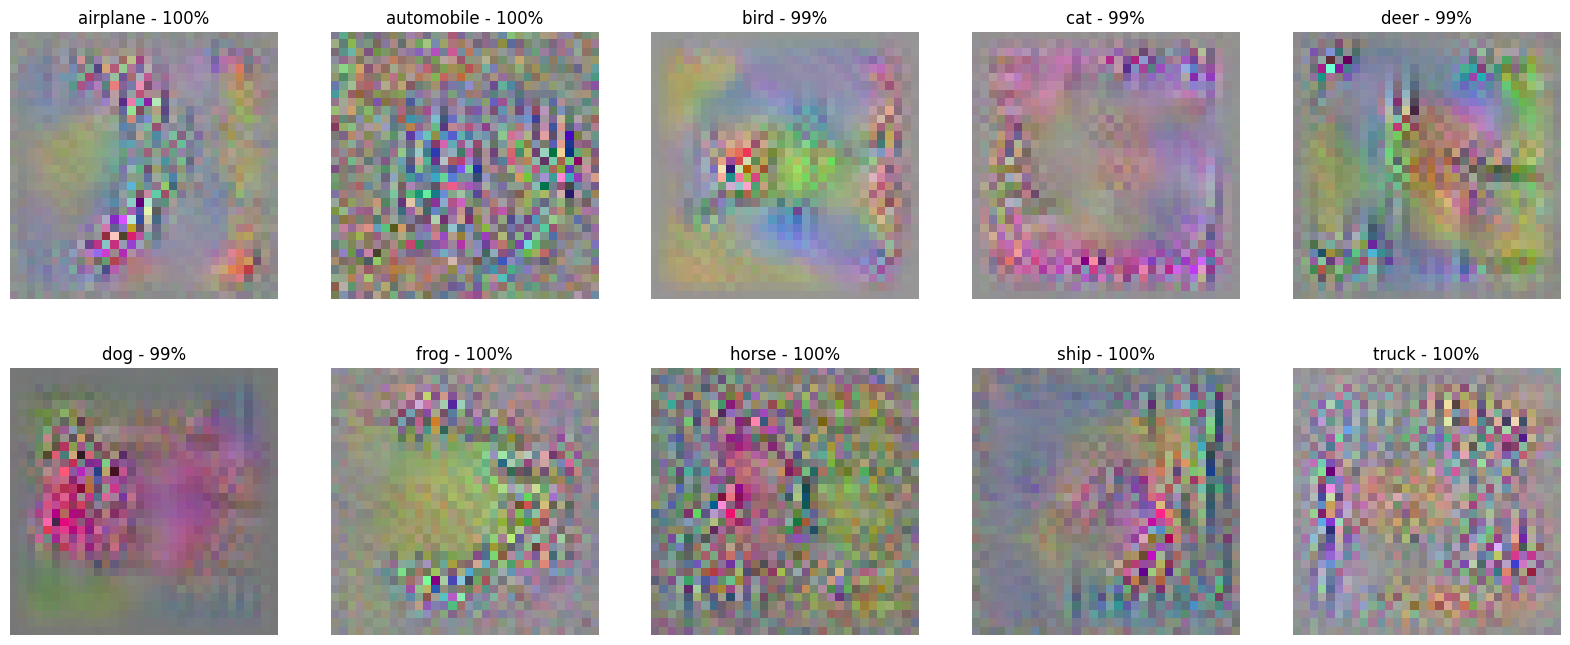

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(20,8))
eff_rfs = []
for class_name, i in tqdm(train_data.class_to_idx.items()):
    desired_output = torch.zeros(10)
    desired_output[i] = 1
    eff_rf = backprop_maximization(model, desired_output, (3,32,32), n_iter=2048, batch_size=1, reduction=True)
    eff_rfs.append(eff_rf)

    out = model(eff_rf.repeat(1,1,1,1))
    index = out.argmax()
    prob = out.max()

    ax = axes.flat[i]
    ax.imshow(eff_rf.transpose(0,2))
    ax.axis('off')
    ax.set_title(class_name + " - {0:.0%}".format(prob))

100%|██████████| 10/10 [01:07<00:00,  6.80s/it]


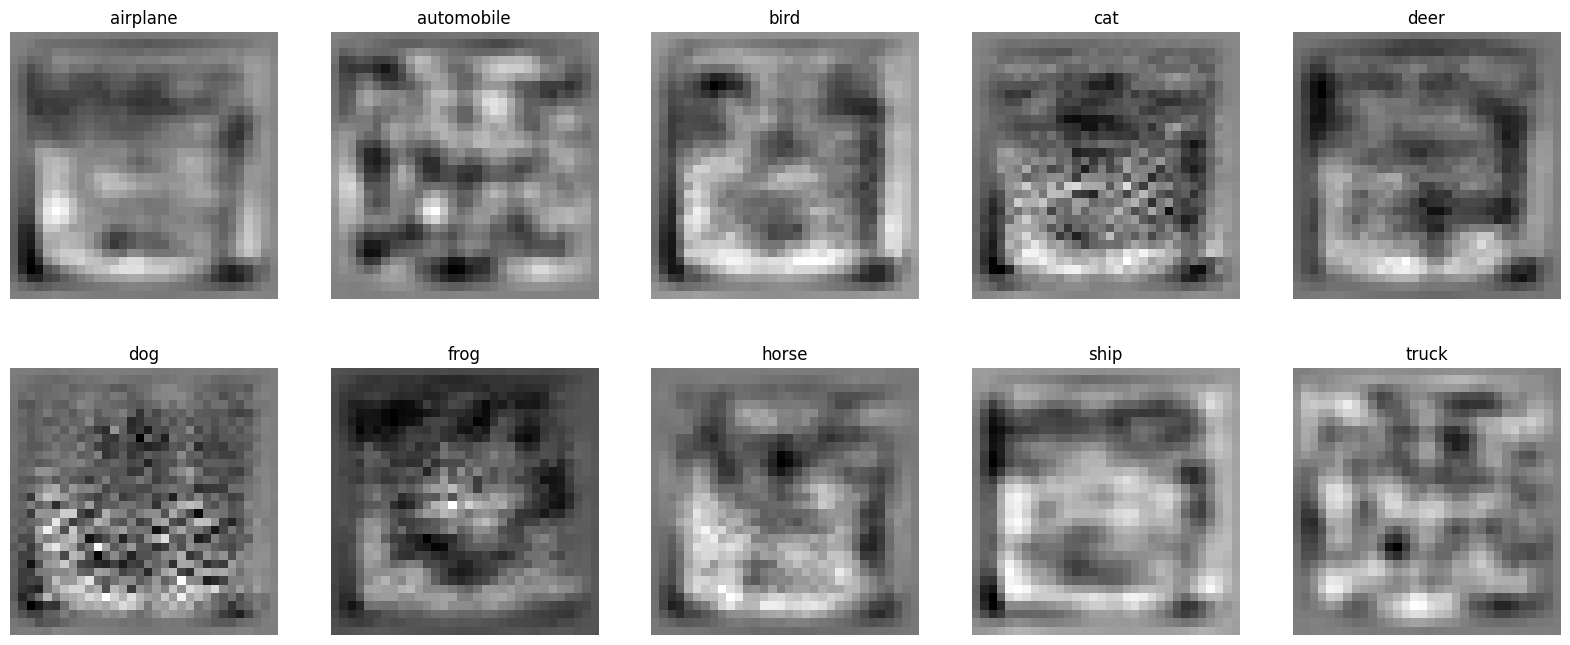

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(20,8))
eff_rfs = []
for class_name, i in tqdm(train_data.class_to_idx.items()):
    desired_output = torch.zeros(10)
    desired_output[i] = 1
    eff_rf = effective_receptive_field(model, desired_output, (3,32,32), n_iter=16384)

    ax = axes.flat[i]
    ax.imshow(eff_rf.mean(0), cmap="gray")
    ax.axis('off')
    ax.set_title(class_name)